In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
#cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
sns.set_palette(cp2)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593234, 0.5357962322183777),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

[(0.025000000000000022, 0.475, 0.025000000000000022),
 (0.95, 0.050000000000000044, 0.050000000000000044),
 (0.050000000000000044, 0.050000000000000044, 0.95),
 (0.95, 0.6323529411764707, 0.050000000000000044),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


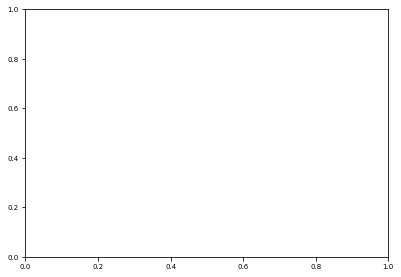

In [6]:
font=8
plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font-1)
plt.rc('ytick', labelsize=font-1)
plt.rc('axes', labelsize=font)


# width as measured in inkscape
width = 3.487
height = width / 1.618*3/2

fig, axs = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.subplots_adjust(left=.15, bottom=.08, right=.99, top=.94)

#import seaborn as sns
#sns.set(style="whitegrid", palette=cpbasic,font_scale=0.2, rc={"lines.linewidth": 1})

In [7]:
import string as str
reps = 1
implementations = ['cuSPARSE_csr11', 'cuSPARSE_coo11', 'CSR5_9', 'cuSPARSE_csr9-2', 'cuSPARSE_hyb9-2']
#['OMP_csr-40', 'cuSPARSE_csr', 'cuSPARSE_hyb', 'cuSPARSE_bsr-2', 'cuSPARSE_bsr-4', 'cuSPARSE_bsr-16', 'cuSPARSE_bsr-64', 'cuCSR5']
dtypes=['D']
for dtype in dtypes:
    #Unified read
    fname = "silver1-TeslaV100_dtype-%s_run_dataset.csv" % dtype
    inputdata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_GPU['System'] = 'TeslaV100'
   # print(inputdata_GPU.head(2))

In [8]:
    fname = "hawk_csr_naive_normal_4-2048_d.out"
    inputdata_csrnaive = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_csrnaive['System'] = 'HawkAmdRome'
    inputdata_csrnaive['implementation'] = 'Naive-CSR-CPU'
    #print(inputdata_csrnaive.head(2))

In [9]:
    fname = "hawk_csr5_normal_4-2048_d.out"
    inputdata_csr5cpu = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_csr5cpu['System'] = 'HawkAmdRome'
    inputdata_csr5cpu['implementation'] = 'CSR5-CPU'
    #print(inputdata_csr5cpu.head(2))

In [10]:
    fname = "hawk_mkl_ie_normal_4-2048_d.out"
    inputdata_mkl = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_mkl['System'] = 'HawkAmdRome'
    #print(inputdata_mkl.head(2))

In [11]:
    fname = "hawk_mkl_ie_normal_4-2048_d_t128.out"
    inputdata_mkl_128 = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_mkl_128['System'] = 'HawkAmdRome'
    inputdata_mkl_128['implementation'] = 'MKL_IE_128'
    #print(inputdata_mkl_128.head(2))

In [12]:
    fname = "xilinx_spmv_4-2048_small_normal_dataset_dtype-%s.csv" % dtype
    inputdata_FPGA = pd.read_csv('../Benchmarks/%s' % fname, names = 
                    ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_FPGA['System'] = 'FPGA'
    print(inputdata_FPGA.head(2))

    mtx_name distribution placement  diagonal_factor  seed       m       n  \
0  synthetic       normal    random              1.0    14  121000  121000   
1  synthetic       normal  diagonal              0.5    14  121000  121000   

       nz   density  A_mem_footprint  ... avg_bandwidth  std_bandwidth  \
0  314355  0.002147          80.3046  ...      0.419536       0.255357   
1  314355  0.002147          31.6747  ...      0.000054       0.000029   

   avg_scattering  std_scattering  implementation      time    gflops W_avg  \
0     5157.325731        0.201622     Xilinx_SpMV  4.000930   4.87971    33   
1    61088.961155        0.246533     Xilinx_SpMV  0.521192  14.86930    33   

   J_estimated  System  
0   132.030690    FPGA  
1    17.199336    FPGA  

[2 rows x 23 columns]


In [13]:
    # MPAKOS fix columns div
    inputdata_GPU['avg_scattering'] = inputdata_GPU['avg_scattering']/inputdata_GPU['n']
    inputdata_GPU['std_scattering'] = inputdata_GPU['std_scattering']/inputdata_GPU['n']
    

In [14]:
    # Merge the results
    inputdata = pd.concat([inputdata_GPU,inputdata_csrnaive])
    inputdata = pd.concat([inputdata,inputdata_csr5cpu])
    inputdata = pd.concat([inputdata,inputdata_mkl])
    inputdata = pd.concat([inputdata,inputdata_mkl_128])
    inputdata = pd.concat([inputdata,inputdata_FPGA])

In [15]:
    # Group per reps, take mean
    groupreps = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation','System']).mean().reset_index()

In [16]:
    plot_x_axis = ['mem_range']
    select_criterion = (groupreps['avg_nz_row'] > 19) & ( groupreps['std_nz_row'] > 1 ) & ( groupreps['std_nz_row'] < 8.03) & ( groupreps['implementation'] == 'Xilinx_SpMV') # & (groupreps['nz'] > 100000)
    select_str = 'avg_nz_row > 19, std_nz_row > 1 , std_nz_row < 8.03\nImplementation = Xilinx_SpMV'
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select = groupreps[select_criterion]
    #groupbench = groupreps_select.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth', 'std_bandwidth','avg_scattering','std_scattering'], as_index =False)

In [17]:
    if ('implementation' in plot_x_axis):
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select, x="implementation", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_format.pdf' % (select_str_id) )
        plt.close()

In [18]:
    if ('mem_range' in plot_x_axis):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [19]:
    if ('distribution' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_select, x="distribution", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_dist.pdf' % (select_str_id) )
        plt.close()

In [20]:
    if ('density' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="density", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_density.pdf' % (select_str_id) )
        plt.close()

In [21]:
    if ('A_mem_footprint' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="A_mem_footprint", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_memfoot.pdf' % (select_str_id) )
        plt.close()

In [22]:
    if ('m' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_select, x="m", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_m.pdf' % (select_str_id) )
        plt.close()
        #fig, axs = plt.subplots() 
        #sns_plot = sns.boxplot(data=groupreps_select, x="n", y="gflops", ax=axs)
        #axs.set_title('Dataset %s' %(select_str))
        #fig.savefig('./Plot_tries/Select_%s_plot_per_n.pdf' % (select_str_id) )
        #plt.close()

In [23]:
    if ('nz' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="nz", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_nz.pdf' % (select_str_id) )
        plt.close()

In [24]:
    if ('avg_nz_row' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_avg_nz_row.pdf' % (select_str_id) )
        plt.close()

In [25]:
    # Group per system, take best
    group_system = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'System'], as_index = False)
    reslist = []
    for desc, experiment in group_system:
        best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
        outrow = experiment[experiment['implementation'] == best_format]
        reslist.append(outrow.values.tolist()[0])
        #print(outrow.values.tolist()[0])
    group_system_best = pd.DataFrame(reslist, columns =['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated', 'System'])
    

In [30]:
    #print(group_system_best[group_system_best['System'] == 'HawkAmdRome'].head(10))   
    plot_x_axis_best = ['mem_range']
    select_criterion = (group_system_best['avg_nz_row'] > 19) & ( group_system_best['std_nz_row'] > 1 ) & ( group_system_best['std_nz_row'] < 8.03) & ( group_system_best['System'] == 'HawkAmdRome') # & (groupreps['nz'] > 100000)
    select_str = 'avg_nz_row > 19, std_nz_row > 1 , std_nz_row < 8.03\nBest of System = HawkAmdRome'
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    
    if ('mem_range' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()
    